In [4]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


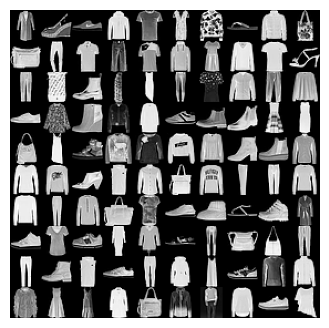

In [3]:
import random
import matplotlib.pyplot as plt
# Define the grid size
grid_size = (10, 10)

# Select random images from the dataset
random_images = random.choices(x_train, k=grid_size[0]*grid_size[1])

# Create subplots
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(4, 4))

# Plot the images
for i, ax in enumerate(axes.flat):
    ax.imshow(random_images[i], cmap='gray')
    ax.axis('off')

# Set padding between the images
plt.subplots_adjust(hspace=0, wspace=0)

# Show the plot
plt.show()


In [26]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model

input_img = Input(shape=(28, 28, 1))
flattened_image = Flatten()(input_img)
first_dense_layer = Dense(64, activation='relu')(flattened_image)
second_dense_layer = Dense(23, activation='relu')(first_dense_layer)
output = Dense(10, activation='softmax')(second_dense_layer)

classifier = Model(input_img, output)
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 23)                1495      
                                                                 
 dense_14 (Dense)            (None, 10)                240       
                                                                 
Total params: 51,975
Trainable params: 51,975
Non-trainable params: 0
_________________________________________________________________


In [27]:
ret = classifier.fit(x_train, y_train, epochs=50, batch_size=2048, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/50
30/30 [==============================] - 0s 7ms/step - loss: 17.0669 - accuracy: 0.2247 - val_loss: 2.2468 - val_accuracy: 0.2216
Epoch 2/50
30/30 [==============================] - 0s 5ms/step - loss: 2.0987 - accuracy: 0.2532 - val_loss: 2.0167 - val_accuracy: 0.2723
Epoch 3/50
30/30 [==============================] - 0s 5ms/step - loss: 1.9889 - accuracy: 0.2763 - val_loss: 1.9487 - val_accuracy: 0.2884
Epoch 4/50
30/30 [==============================] - 0s 5ms/step - loss: 1.9265 - accuracy: 0.3010 - val_loss: 1.8853 - val_accuracy: 0.3161
Epoch 5/50
30/30 [==============================] - 0s 5ms/step - loss: 1.8501 - accuracy: 0.3320 - val_loss: 1.8347 - val_accuracy: 0.3411
Epoch 6/50
30/30 [==============================] - 0s 5ms/step - loss: 1.7938 - accuracy: 0.3484 - val_loss: 1.7778 - val_accuracy: 0.3481
Epoch 7/50
30/30 [==============================] - 0s 5ms/step - loss: 1.7352 - accuracy: 0.3584 - val_loss: 1.7135 - val_accuracy: 0.3814
Epoch 8/50
30/30 [=

In [28]:
ret.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

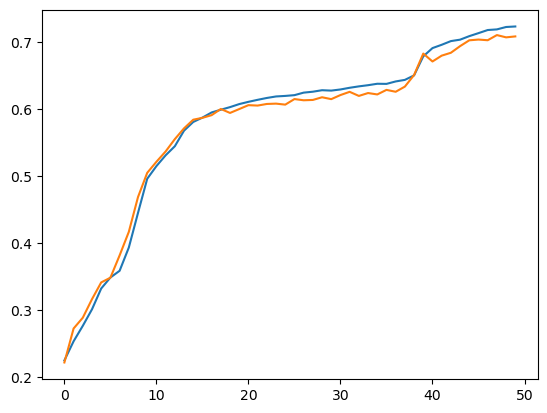

In [29]:
plt.plot(ret.history['accuracy'])
plt.plot(ret.history['val_accuracy'])

In [34]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model

input_img = Input(shape=(28, 28, 1))
first_conv_layer = Conv2D(10, (3, 3), activation='relu', padding='same')(input_img)
max_pooling_layer = MaxPooling2D((2, 2), padding='same')(first_conv_layer)
second_conv_layer = Conv2D(5, (3, 3), activation='relu', padding='same')(max_pooling_layer)
max_pooling_layer2 = MaxPooling2D((2, 2), padding='same')(second_conv_layer)
third_conv_layer = Conv2D(5, (3, 3), activation='relu', padding='same')(max_pooling_layer2)
max_pooling_layer3 = MaxPooling2D((2, 2), padding='same')(third_conv_layer)
flattened_image = Flatten()(max_pooling_layer3)
output = Dense(10, activation='softmax')(flattened_image)

classifier = Model(input_img, output)
inspect = Model(input_img, max_pooling_layer)
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 5)         455       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 5)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 5)           230 

In [36]:
ret = classifier.fit(x_train, y_train, epochs=20, batch_size=2048, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/20
30/30 [==============================] - 3s 89ms/step - loss: 1.3124 - accuracy: 0.5658 - val_loss: 1.2575 - val_accuracy: 0.5791
Epoch 2/20
30/30 [==============================] - 3s 90ms/step - loss: 1.2097 - accuracy: 0.5963 - val_loss: 1.1733 - val_accuracy: 0.6054
Epoch 3/20
30/30 [==============================] - 3s 89ms/step - loss: 1.1310 - accuracy: 0.6204 - val_loss: 1.1073 - val_accuracy: 0.6269
Epoch 4/20
30/30 [==============================] - 3s 93ms/step - loss: 1.0690 - accuracy: 0.6396 - val_loss: 1.0548 - val_accuracy: 0.6452
Epoch 5/20
30/30 [==============================] - 3s 90ms/step - loss: 1.0180 - accuracy: 0.6548 - val_loss: 1.0085 - val_accuracy: 0.6582
Epoch 6/20
30/30 [==============================] - 3s 90ms/step - loss: 0.9751 - accuracy: 0.6674 - val_loss: 0.9708 - val_accuracy: 0.6698
Epoch 7/20
30/30 [==============================] - 3s 89ms/step - loss: 0.9380 - accuracy: 0.6781 - val_loss: 0.9375 - val_accuracy: 0.6805
Epoch 8/20
30

  1/313 [..............................] - ETA: 4s

313/313 [==============================] - 0s 955us/step


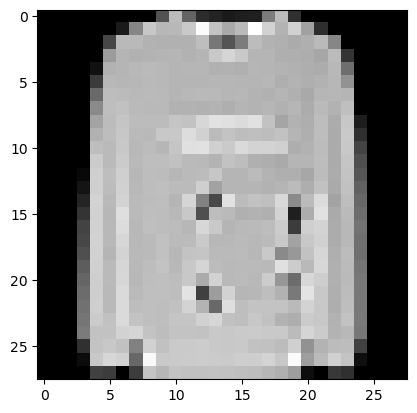

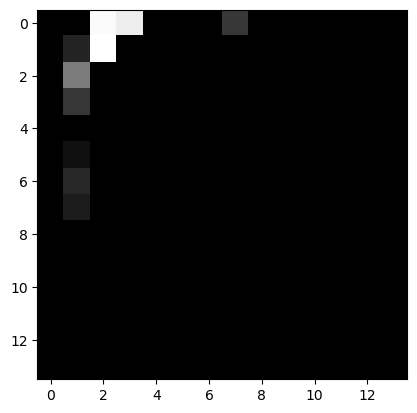

In [43]:
inspect_output = inspect.predict(x_test)
plt.figure()
plt.imshow(x_test[46], cmap='gray')
plt.figure()
plt.imshow(inspect_output[46, :, :, 8], cmap='gray')